# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city

city_data = []

city_data_df = pd.DataFrame(columns=["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
   
    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
    
    # Append the City information into city_data list
        city_data.append({
             "City": city,
             "Lat": city_weather['coord']['lat'],
             "Lng": city_weather['coord']['lon'],
             "Max Temp": city_weather['main']['temp_max'],
             "Humidity": city_weather['main']['humidity'],
             "Cloudiness": city_weather['clouds']['all'],
             "Wind Speed": city_weather['wind']['speed'],
             "Country": city_weather['sys']['country'],
             "Date": city_weather['dt']})
        
         
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
 #Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | alofi
Processing Record 3 of Set 1 | hiratacho
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | wailua homesteads
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | sao joao da barra
Processing Record 9 of Set 1 | bayanhongor
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | vorgashor
Processing Record 12 of Set 1 | nadym
Processing Record 13 of Set 1 | kigoma
Processing Record 14 of Set 1 | bubaque
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | alice springs
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | fortaleza
Processing Record 19 of Set 1 | megion
Processing Record 20 of Set 1 | st. john's
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | ushuaia
Processing Rec

Processing Record 36 of Set 4 | ilulissat
Processing Record 37 of Set 4 | merizo village
Processing Record 38 of Set 4 | bonyhad
Processing Record 39 of Set 4 | zhezqazghan
Processing Record 40 of Set 4 | ha
City not found. Skipping...
Processing Record 41 of Set 4 | codrington
Processing Record 42 of Set 4 | minas de marcona
Processing Record 43 of Set 4 | tahe
Processing Record 44 of Set 4 | olenino
Processing Record 45 of Set 4 | daru
Processing Record 46 of Set 4 | kailua-kona
Processing Record 47 of Set 4 | norilsk
Processing Record 48 of Set 4 | lompoc
Processing Record 49 of Set 4 | al hamul
Processing Record 0 of Set 5 | saint-francois
Processing Record 1 of Set 5 | namibe
Processing Record 2 of Set 5 | tromso
Processing Record 3 of Set 5 | ulaangom
Processing Record 4 of Set 5 | luena
Processing Record 5 of Set 5 | rawson
Processing Record 6 of Set 5 | ribeira grande
Processing Record 7 of Set 5 | dudinka
Processing Record 8 of Set 5 | tefe
Processing Record 9 of Set 5 | tweed

Processing Record 30 of Set 8 | halifax
Processing Record 31 of Set 8 | kota belud
Processing Record 32 of Set 8 | tomok bolon
City not found. Skipping...
Processing Record 33 of Set 8 | northam
Processing Record 34 of Set 8 | lazaro cardenas
Processing Record 35 of Set 8 | necochea
Processing Record 36 of Set 8 | nemuro
Processing Record 37 of Set 8 | vadso
Processing Record 38 of Set 8 | san jose del guaviare
Processing Record 39 of Set 8 | ribeira brava
Processing Record 40 of Set 8 | khabary
Processing Record 41 of Set 8 | anuradhapura
Processing Record 42 of Set 8 | nanga eboko
Processing Record 43 of Set 8 | al wajh
Processing Record 44 of Set 8 | kili
Processing Record 45 of Set 8 | ranikhet
Processing Record 46 of Set 8 | whitehorse
Processing Record 47 of Set 8 | akureyri
Processing Record 48 of Set 8 | chernyshevskiy
Processing Record 49 of Set 8 | guachochi
City not found. Skipping...
Processing Record 0 of Set 9 | ende
Processing Record 1 of Set 9 | dauphin
Processing Recor

Processing Record 18 of Set 12 | sao jose da coroa grande
Processing Record 19 of Set 12 | banff
Processing Record 20 of Set 12 | sittwe
Processing Record 21 of Set 12 | newman
Processing Record 22 of Set 12 | wabern
Processing Record 23 of Set 12 | kerema
Processing Record 24 of Set 12 | brokopondo
Processing Record 25 of Set 12 | swakopmund
Processing Record 26 of Set 12 | agios nikolaos
Processing Record 27 of Set 12 | colonia
Processing Record 28 of Set 12 | mejit
Processing Record 29 of Set 12 | marquette
Processing Record 30 of Set 12 | pechory
Processing Record 31 of Set 12 | sao vicente
Processing Record 32 of Set 12 | sona
Processing Record 33 of Set 12 | taroa
Processing Record 34 of Set 12 | bushland beach
City not found. Skipping...
Processing Record 35 of Set 12 | bako
Processing Record 36 of Set 12 | springbok
Processing Record 37 of Set 12 | abasolo
Processing Record 38 of Set 12 | robertsport
-----------------------------
Data Retrieval Complete      
------------------

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,302.13,87,78,3.13,EC,1701721894
1,alofi,-19.0595,-169.9187,301.09,74,75,4.12,NU,1701721895
2,hiratacho,35.4333,132.8167,279.16,66,100,2.75,JP,1701721896
3,papatowai,-46.5619,169.4708,284.60,59,5,3.25,NZ,1701721897
4,adamstown,-25.0660,-130.1015,295.89,77,95,5.37,PN,1701721898


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,302.13,87,78,3.13,EC,1701721894
1,alofi,-19.0595,-169.9187,301.09,74,75,4.12,NU,1701721895
2,hiratacho,35.4333,132.8167,279.16,66,100,2.75,JP,1701721896
3,papatowai,-46.5619,169.4708,284.60,59,5,3.25,NZ,1701721897
4,adamstown,-25.0660,-130.1015,295.89,77,95,5.37,PN,1701721898


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

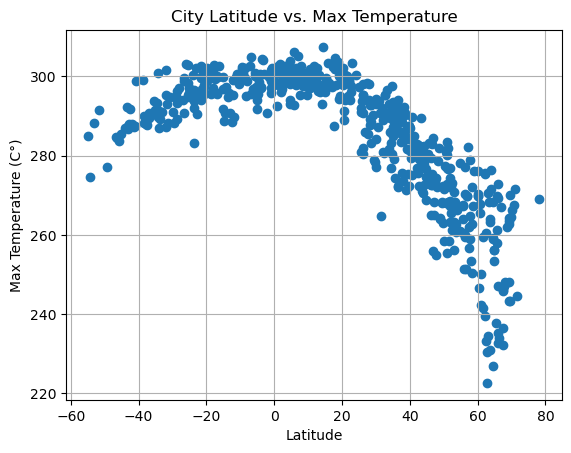

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C°)')
plt.grid(True, which = 'both')

# Save the figure
plt.savefig("../output_data/'City_Latitude_vs._Max_Temperature'.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

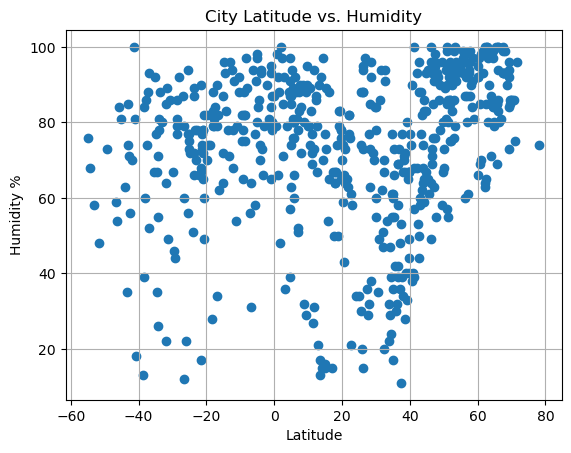

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid(True, which = 'both')

# Save the figure
plt.savefig("../output_data/City_Latitude_vs._Humidit_.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

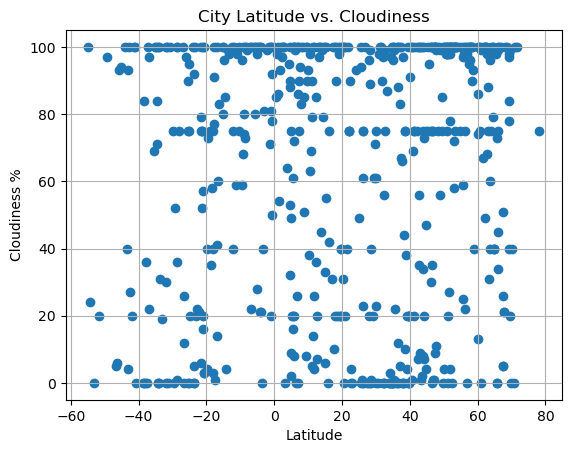

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties

plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid(True, which = 'both')

# Save the figure
plt.savefig("../output_data/City_Latitude_vs._Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

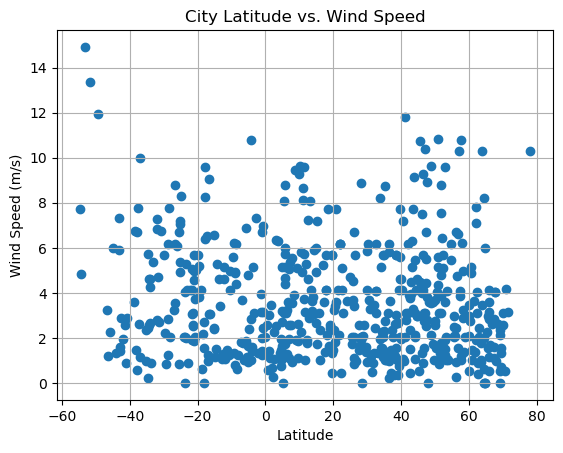

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties

plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True, which = 'both')

# Save the figure
plt.savefig("../output_data/City_Latitude_vs._Wind_Speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def lin_reg(x_values, y_values, xlabel, ylabel):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    
    reg_val = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    
    plt.scatter(x_values,y_values)

    
    plt.plot(x_values,reg_val,"r-")
    
    
    plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    print(f"The r-squared is: {rvalue**2}")

    
    plt.show()


In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hiratacho,35.4333,132.8167,279.16,66,100,2.75,JP,1701721896
5,wailua homesteads,22.0669,-159.3780,298.63,82,75,6.17,US,1701721899
8,bayanhongor,46.7167,100.1167,256.01,76,1,2.74,MN,1701721901
10,vorgashor,67.5833,63.9500,245.79,93,5,2.79,RU,1701721904
11,nadym,65.5333,72.5167,237.67,100,98,2.24,RU,1701721741


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,302.13,87,78,3.13,EC,1701721894
1,alofi,-19.0595,-169.9187,301.09,74,75,4.12,NU,1701721895
3,papatowai,-46.5619,169.4708,284.60,59,5,3.25,NZ,1701721897
4,adamstown,-25.0660,-130.1015,295.89,77,95,5.37,PN,1701721898
6,hermanus,-34.4187,19.2345,290.69,71,100,2.56,ZA,1701721900


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7576900515971821


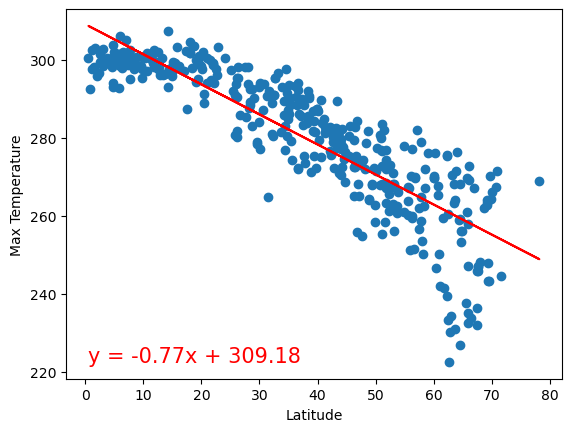

In [31]:
# Linear regression on Northern Hemisphere

lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature')



The r-squared is: 0.4600618553490963


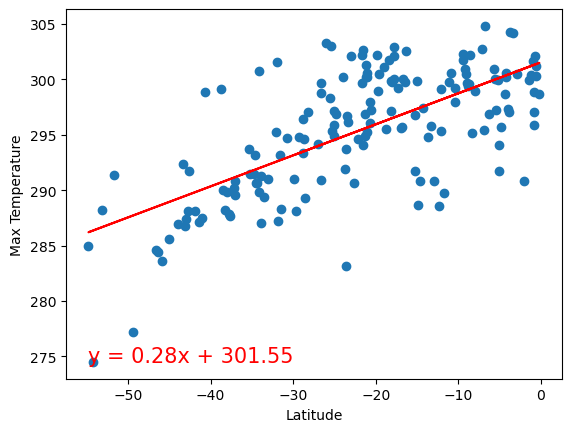

In [32]:
# Linear regression on Southern Hemisphere

lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature')



**Discussion about the linear relationship:** 

From the graphs relating Latitude and Max temperature we can easily see that there is a correlation between the two. As expected the temperature increases the closest we get to the equator (Latitude = 0). The strongest correlation seen in the first graph might just be due to the greater number of cities that we are examining for the northern hemisphere, that is due to the fact that the northern hemisphere hosts a higher amount of land compared to the southern.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.08853894718234899


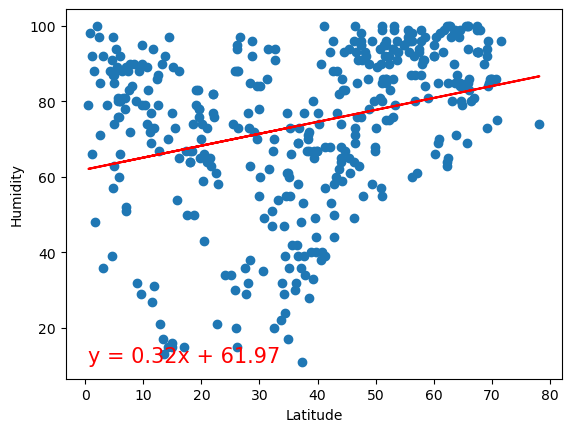

In [33]:
# Northern Hemisphere

lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity')



The r-squared is: 0.09208710355659479


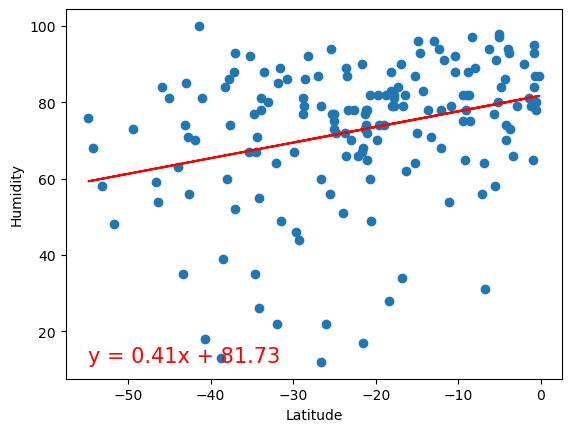

In [34]:
# Southern Hemisphere

lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity')



**Discussion about the linear relationship:** 

In the two graphs relating Humidity and Latitude we can see some relation between the latitude and the humidity of the cities that we have in analysis, that might also be expected, tropical climates are the one with an higher amount of humidity compared to the other environments and our graph help us locating them. In fact these climates are found close to the equator , Latitude = 0.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0059668440313481895


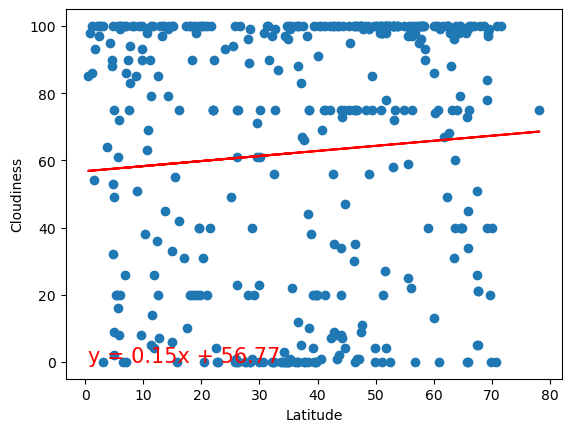

In [35]:
# Northern Hemisphere

lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')



The r-squared is: 0.0738748819923583


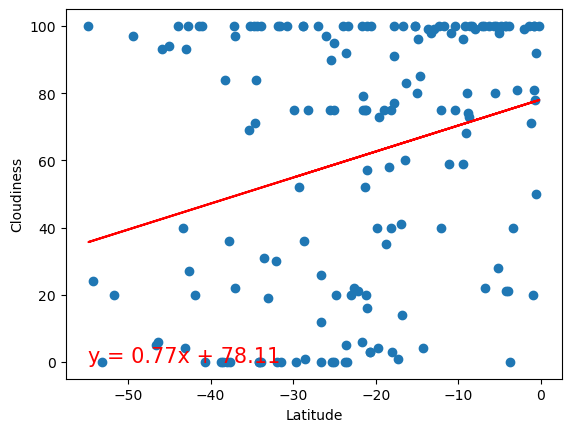

In [37]:
# Southern Hemisphere

lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')



**Discussion about the linear relationship:** 

The two graphs correlating Latitude and Cloudiness can be interesting to talk about the one that examines the northern hemisphere, we don't see any possible relationship between the two variables. Cloudiness in fact is not depending on the latitude of a place but depends on other geographical micro factors. 
The second graph by itself might suggest a correlation between the two variable in exam but it might be due to the fact that the selection of the cities was randomic but also to the fact that in the southern hemisphere the emerged land is mostly located around the equator, that might cause the more accentuated correlation that we are seeing in the graph.


### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.004011920188799488


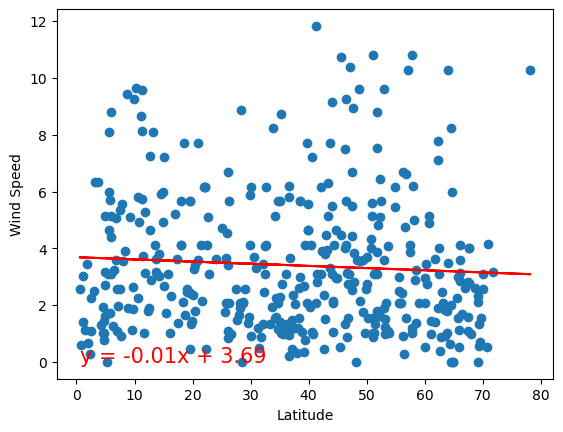

In [36]:
# Northern Hemisphere

lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')



The r-squared is: 0.04971701764102271


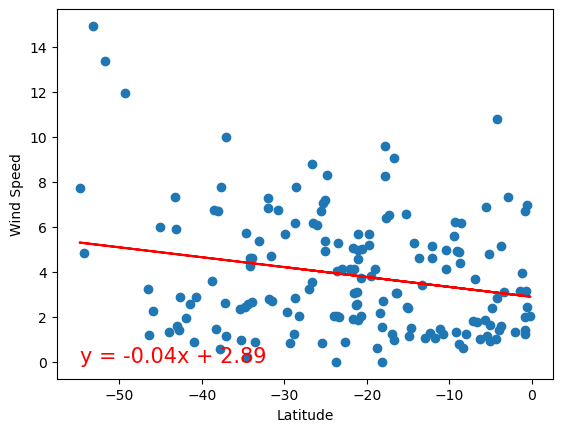

In [38]:
# Southern Hemisphere

lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')



**Discussion about the linear relationship:** 

For what concerns the last two graphs we can easily see that there is no visible correlation between the wind speed and Latitude. That is because wind speed like cloudiness is influenced by multiple factors and can gratelly farry in between different days. The dataset in analysis is considering just one day that can let us conclude that there is no correlation possible for these two variables.